# A tutorial on using the persistent cup length algorithm

In [ ]:
!pip install ripser
!pip install scipy==1.10.1

Restart the session after installing above libraries!

Then, upload **cup_length_utils.py, dreimac_utils.py, and dreimac_combinatorial.py** to this colab notebook and run the rest of the cells.

In [1]:
from cup_length_utils import *
from dreimac_utils import *
from dreimac_combinatorial import *

Below is an example usage of the persistent cup length algorithm on a torus:

Computed rips filtration in 0.01 mins


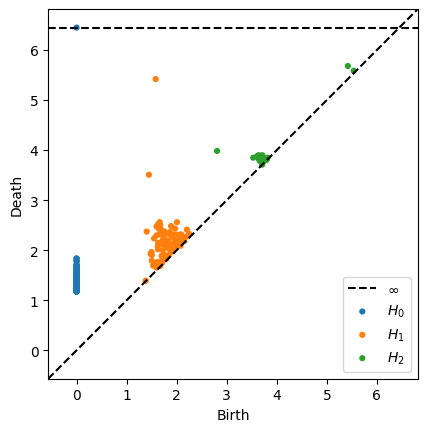

cup length 2 interval: (2.807029962539673, 3.5068581104278564)
Function took 0.51 minutes to run.
Cup length 1.0 appears 40 times
Cup length 2.0 appears 1 times


In [22]:
np.random.seed(42)
# Parameters
n_points = 2000  # Number of points to sample
R = 5  # Major radius of the torus
r = 2  # Minor radius of the torus


# Sample points from a torus
torus_points = sample_torus(n_points, R, r)

# Create a distance matrix from the point cloud
d = pairwise_distances(torus_points, metric='euclidean')
threshold = np.max(d[~np.isinf(d)])


# Compute persistent homology on a subsampled point cloud.
ripser_result = rips_filtration_diagram(data = d, distance_matrix = True, n_landmarks = 150, thresh = threshold)
dgms = ripser_result['dgms']
plot_diagrams(dgms, show=True)


# Compute the threshold persistence
min_persistence = compute_threshold_persistence(dgms[1])


t0 = time.time()
# Compute persistent cup length
(persistent_cup_length_matrix, b_times, d_times, cup_length_2) = compute_persistent_cup_length_ripser(2, \
                                                    ripser_result, \
                                                    d, \
                                                    min_persistence, \
                                                    threshold)

t1 = time.time()
elapsed_time = (t1 - t0) / 60

print(f"Function took {elapsed_time:.2f} minutes to run.")

nonzero_elements = persistent_cup_length_matrix[persistent_cup_length_matrix != 0]
unique_vals, counts = np.unique(nonzero_elements, return_counts=True)
for value, count in zip(unique_vals, counts):
    print(f"Cup length {value} appears {count} times")

Below is a visualization of the cup length computation, showing two most persistent 1-bars in orange, the most persistent 2-bar in green, and the resulting cup length 2 interval in black.

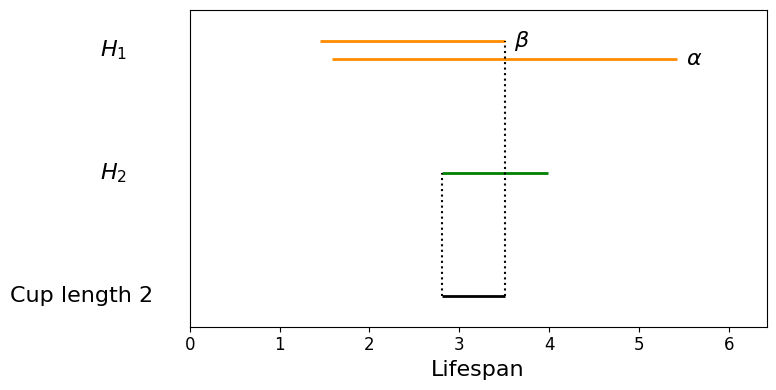

In [23]:
def top_persistent_bars(dgm, top_k):
    return sorted(dgm, key=lambda x: x[1] - x[0], reverse=True)[:top_k]

# Extract top persistent bars
top_H1 = top_persistent_bars(dgms[1], 2)  # Top 2 from H1
top_H2 = top_persistent_bars(dgms[2], 1)  # Top 1 from H2


ph_data_example = [
    np.array(top_H1),  # H1
    np.array(top_H2)   # H2
]

plot_persistent_homology_barcodes(ph_data_example, cup_interval=cup_length_2[0])

Draw persistent cup length function:

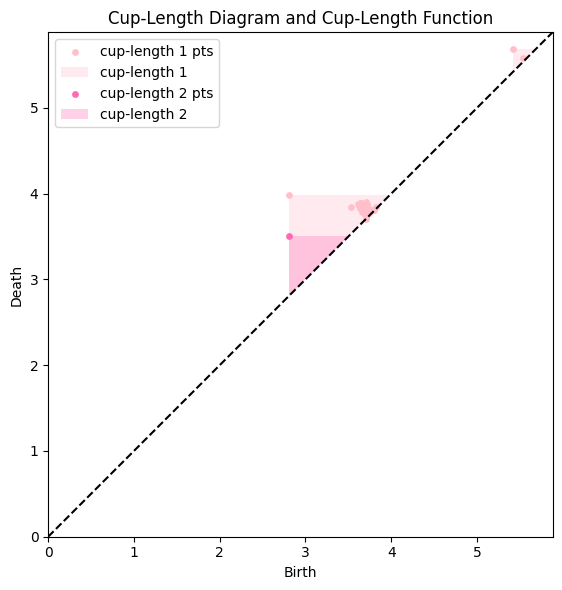

Critical points (cup-length 2): [(2.807029962539673, 3.5068581104278564)]
Polygon vertices (cup-length 2): [[(2.807029962539673, 2.807029962539673), (2.807029962539673, 3.5068581104278564), (3.5068581104278564, 3.5068581104278564)]]


In [24]:
result_dict = plot_and_extract_staircase_polygons(
    persistent_cup_length_matrix, b_times, d_times,
    facecolors={1: 'pink', 2: 'hotpink', 3: 'orange'},
    pointcolors={1: 'pink', 2: 'hotpink', 3: 'orange'},
    show_polygon_vertices=False
)

# Example: inspect cup-length 2 results
cup2 = result_dict.get(2, {})
print("Critical points (cup-length 2):", cup2.get('critical_points'))
print("Polygon vertices (cup-length 2):", cup2.get('polygon'))


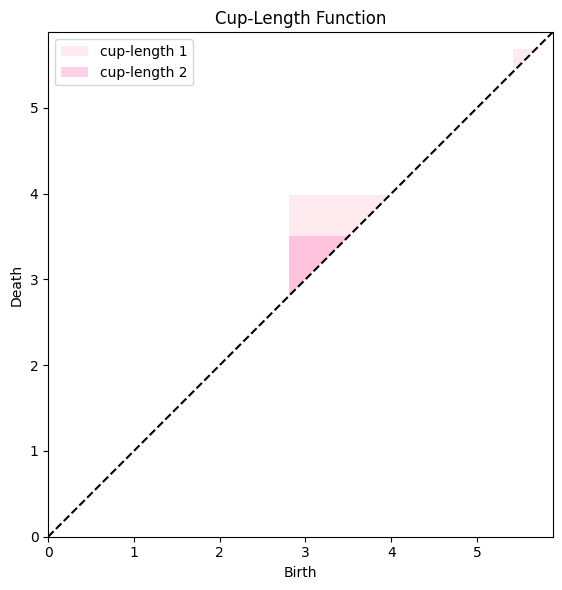

In [25]:
result_dict = plot_and_extract_staircase_polygons(
    persistent_cup_length_matrix, b_times, d_times,
    facecolors={1: 'pink', 2: 'hotpink', 3: 'orange'},
    pointcolors={1: 'pink', 2: 'hotpink', 3: 'orange'},
    show_polygon_vertices=False,
    show_cup_length_diagram=False
)